# Dataset description

## Dataset info

link https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma/data


## Problem description

Services like Uber and Lyft have transformed urban transportation, offering flexibility and convenience to millions of users. This project leverages a comprehensive dataset from Kaggle, featuring Uber and Lyft trip data from Boston, to uncover patterns and relationships affecting ride prices, travel times, and service availability. The primary objective is to gain actionable insights that benefit both users and service providers.

The dataset contains detailed information about Uber and Lyft rides in Boston, including attributes such as date, time, pickup and drop-off coordinates, ride costs across different service categories, weather conditions, travel distance, and the impact of traffic congestion. Using this data, the project aims to understand pricing dynamics, such as how factors like time of day, day of the week, and weather influence ride prices. It also seeks to compare Uber and Lyft services to identify differences in pricing strategies, availability, and user experience

# Dependencies loading

In [4]:
#libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(2024)

# Data loading

In [5]:
data = pd.read_csv('../data/input/rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# Data info

In [3]:
sum(data.id.value_counts()>1)

0

It looks like we don't have any duplicates of rides, so we can get rid of id column.

In [4]:
data=data.drop(['id'],axis=1)

## Unique values

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   timestamp                    693071 non-null  float64
 1   hour                         693071 non-null  int64  
 2   day                          693071 non-null  int64  
 3   month                        693071 non-null  int64  
 4   datetime                     693071 non-null  object 
 5   timezone                     693071 non-null  object 
 6   source                       693071 non-null  object 
 7   destination                  693071 non-null  object 
 8   cab_type                     693071 non-null  object 
 9   product_id                   693071 non-null  object 
 10  name                         693071 non-null  object 
 11  price                        637976 non-null  float64
 12  distance                     693071 non-null  float64
 13 

In [6]:
data.columns

Index(['timestamp', 'hour', 'day', 'month', 'datetime', 'timezone', 'source',
       'destination', 'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax

In [7]:
data.shape

(693071, 56)

In [8]:
data.nunique().sort_values()

timezone                           1
month                              2
cab_type                           2
uvIndex                            3
icon                               7
surge_multiplier                   7
short_summary                      9
latitude                          11
long_summary                      11
destination                       12
source                            12
longitude                         12
product_id                        13
name                              13
day                               17
moonPhase                         18
uvIndexTime                       20
temperatureHighTime               23
temperatureMaxTime                23
hour                              24
temperatureMinTime                25
windGustTime                      25
apparentTemperatureMaxTime        27
apparentTemperatureHighTime       27
precipProbability                 29
apparentTemperatureMinTime        29
temperatureLowTime                31
a

We have only 1 timezone so we can drop it.


In [9]:
data=data.drop(['timezone'],axis=1)

In [10]:
duplicated_rows = data[data.duplicated(keep=False)]
print(duplicated_rows)

           timestamp  hour  day  month             datetime  \
5059    1.543464e+09     3   29     11  2018-11-29 03:56:07   
5334    1.543275e+09    23   26     11  2018-11-26 23:33:14   
5862    1.543316e+09    10   27     11  2018-11-27 10:45:23   
6011    1.543350e+09    20   27     11  2018-11-27 20:15:22   
6227    1.543238e+09    13   26     11  2018-11-26 13:20:09   
...              ...   ...  ...    ...                  ...   
690733  1.544958e+09    10   16     12  2018-12-16 10:55:04   
690736  1.544958e+09    10   16     12  2018-12-16 10:55:04   
691761  1.544922e+09     0   16     12  2018-12-16 00:55:05   
692491  1.543294e+09     4   27     11  2018-11-27 04:42:21   
692714  1.543441e+09    21   28     11  2018-11-28 21:38:08   

                         source              destination cab_type  \
5059          Boston University                 Back Bay     Uber   
5334              North Station                   Fenway     Uber   
5862         Financial District     

In [11]:
data.duplicated().sum()

np.int64(1046)

In [12]:
data = data.drop_duplicates()
data.shape

(692025, 55)

We got rid of duplicated rows

## Null values

In [13]:
data.isnull().sum().sort_values(ascending=False)


price                          54703
hour                               0
timestamp                          0
month                              0
datetime                           0
source                             0
day                                0
destination                        0
cab_type                           0
product_id                         0
name                               0
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
t

In [14]:
data  = data.dropna()


We removed null values

## Target variable

Our target variable is price.


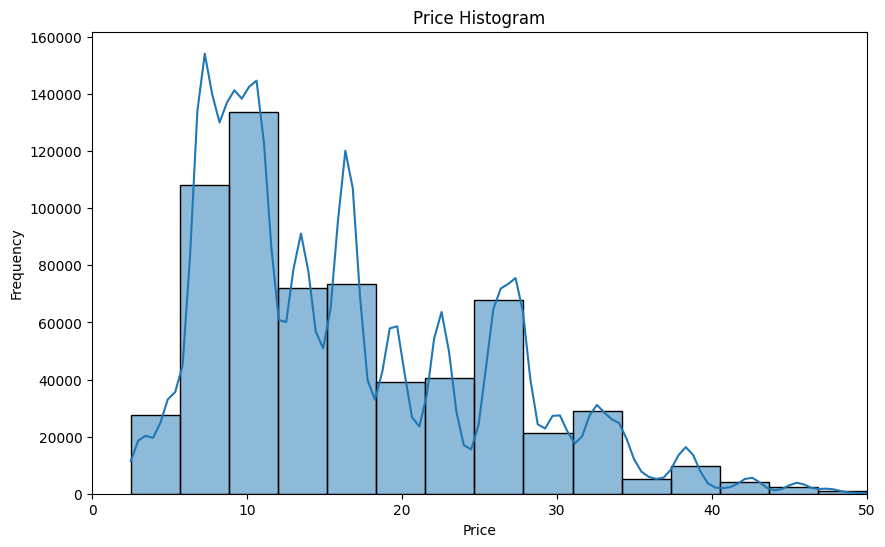

In [16]:
# Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price Histogram')
plt.xlim(0, 50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [18]:
data['price'].describe()

count    637322.000000
mean         16.547041
std           9.325415
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

## Feature description

### Categorical

In [19]:
data.dtypes[data.dtypes == 'object']

datetime         object
source           object
destination      object
cab_type         object
product_id       object
name             object
short_summary    object
long_summary     object
icon             object
dtype: object

In [20]:
data.describe(include=['O'])

,datetime,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,637322,637322,637322,637322,637322,637322,637322,637322,637322
unique,31350,12,12,2,12,12,9,11,7
top,2018-11-26 23:33:14,Financial District,Financial District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,Overcast,Mostly cloudy throughout the day.,cloudy
freq,150,54136,54150,330070,55030,55030,201239,186023,201239


#### Source

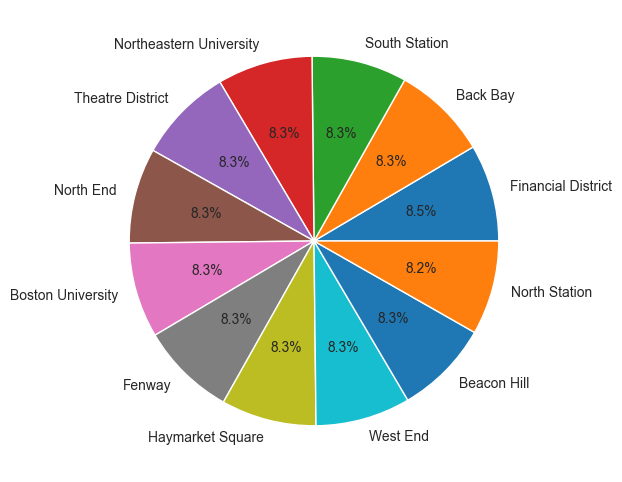

In [22]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['source'].value_counts(),labels=data['source'].value_counts().index,autopct='%1.1f%%')
plt.show()

#### Destination 

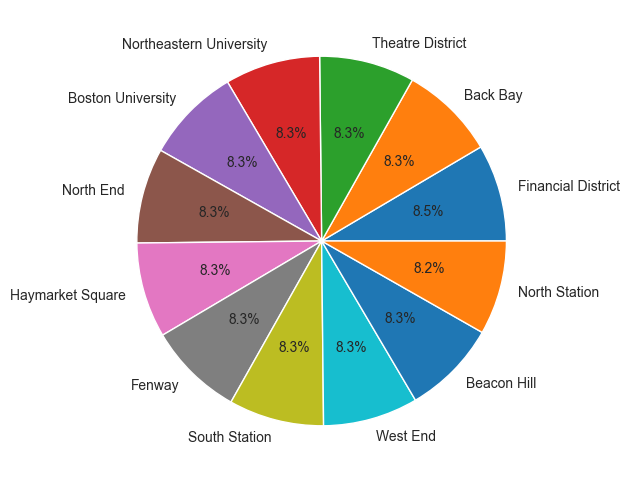

In [26]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['destination'].value_counts(),labels=data['destination'].value_counts().index,autopct='%1.1f%%')
plt.show()

#### Cab Type

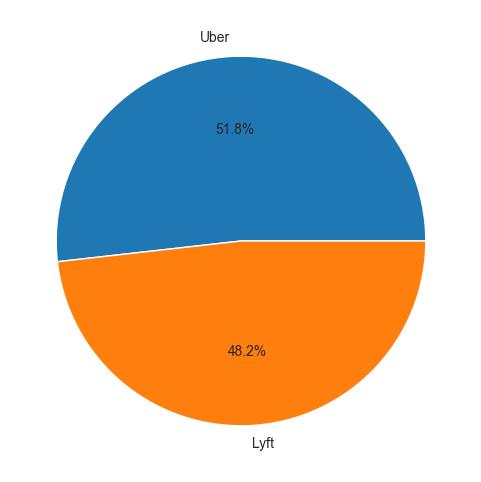

In [27]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['cab_type'].value_counts(),labels=data['cab_type'].value_counts().index,autopct='%1.1f%%')
plt.show()

#### Name

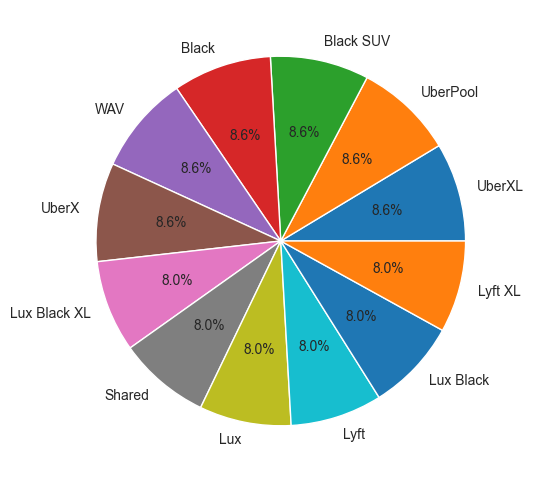

In [29]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['name'].value_counts(),labels=data['name'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [38]:
data.groupby(['cab_type','name']).size()


cab_type  name        
Lyft      Lux             51211
          Lux Black       51205
          Lux Black XL    51215
          Lyft            51206
          Lyft XL         51200
          Shared          51215
Uber      Black           55011
          Black SUV       55012
          UberPool        55020
          UberX           54994
          UberXL          55030
          WAV             55003
dtype: int64

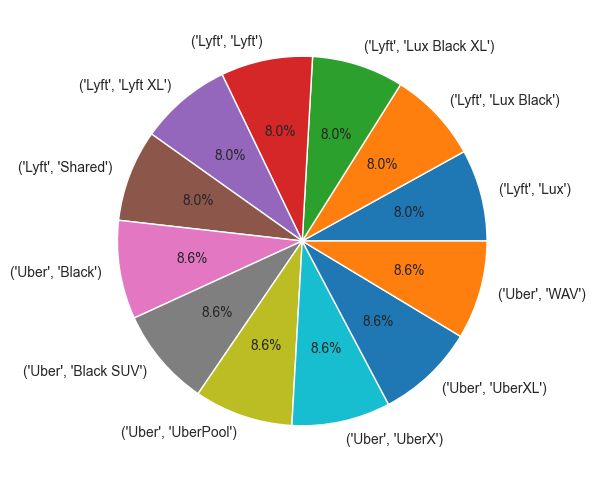

In [32]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
grouped_data = data.groupby(['cab_type', 'name']).size()
plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%')
plt.show()

#### Product id

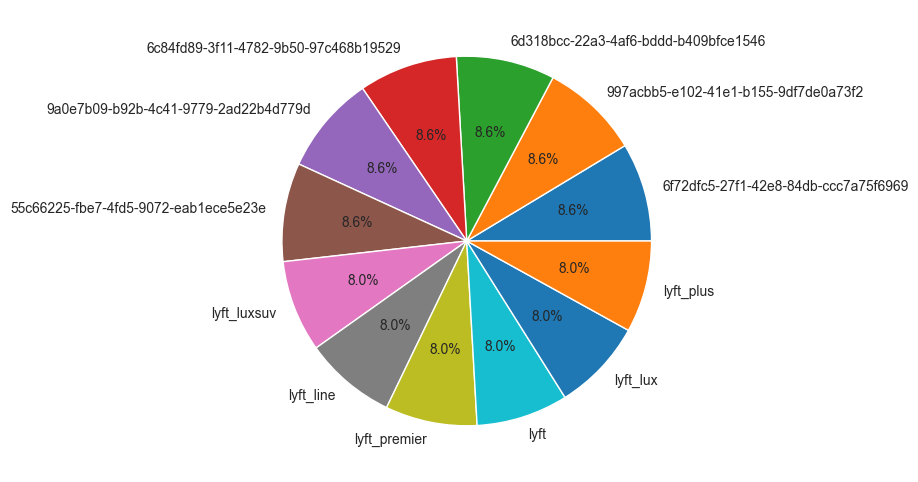

In [ ]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['product_id'].value_counts(),labels=data['product_id'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [ ]:
data.groupby(['cab_type','name','product_id']).size()

cab_type  name          product_id                          
Lyft      Lux           lyft_premier                            51211
          Lux Black     lyft_lux                                51205
          Lux Black XL  lyft_luxsuv                             51215
          Lyft          lyft                                    51206
          Lyft XL       lyft_plus                               51200
          Shared        lyft_line                               51215
Uber      Black         6c84fd89-3f11-4782-9b50-97c468b19529    55011
          Black SUV     6d318bcc-22a3-4af6-bddd-b409bfce1546    55012
          UberPool      997acbb5-e102-41e1-b155-9df7de0a73f2    55020
          UberX         55c66225-fbe7-4fd5-9072-eab1ece5e23e    54994
          UberXL        6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55030
          WAV           9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55003
dtype: int64

We can get rid of product id column as it is the same as name column

In [41]:
data.drop(['product_id'],axis=1,inplace=True)

#### short summary 

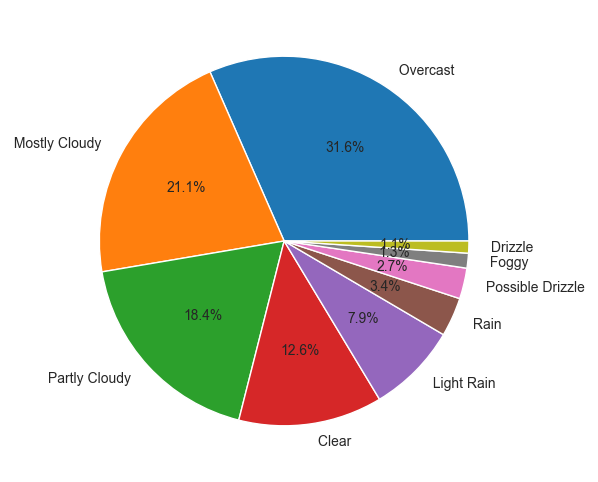

In [45]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['short_summary'].value_counts(),labels=data['short_summary'].value_counts().index,autopct='%1.1f%%')
plt.show()

#### long summary 

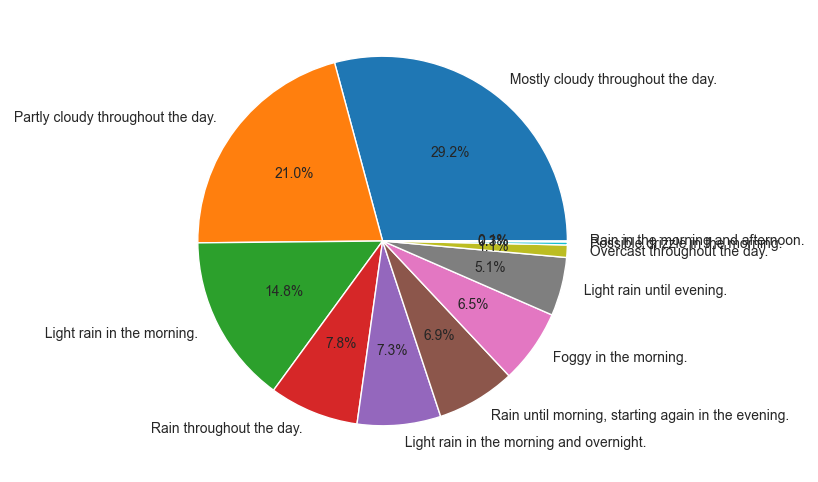

In [46]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['long_summary'].value_counts(),labels=data['long_summary'].value_counts().index,autopct='%1.1f%%')
plt.show()

#### icon 

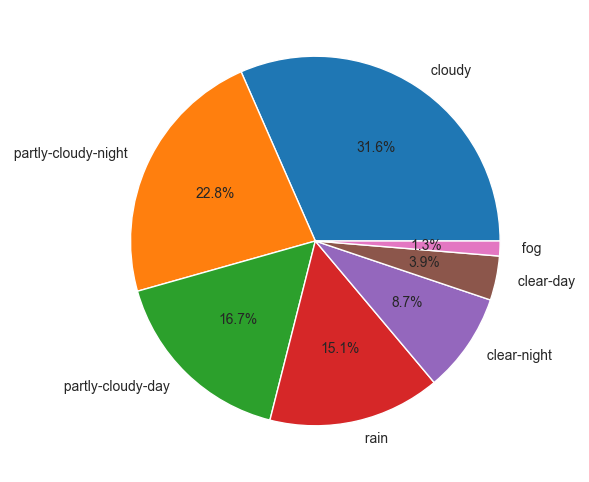

In [47]:
sns.set_style("whitegrid",{'font_scale':'1.6'})
plt.figure(figsize=(6,6))
plt.pie(data['icon'].value_counts(),labels=data['icon'].value_counts().index,autopct='%1.1f%%')
plt.show()

### Numerical

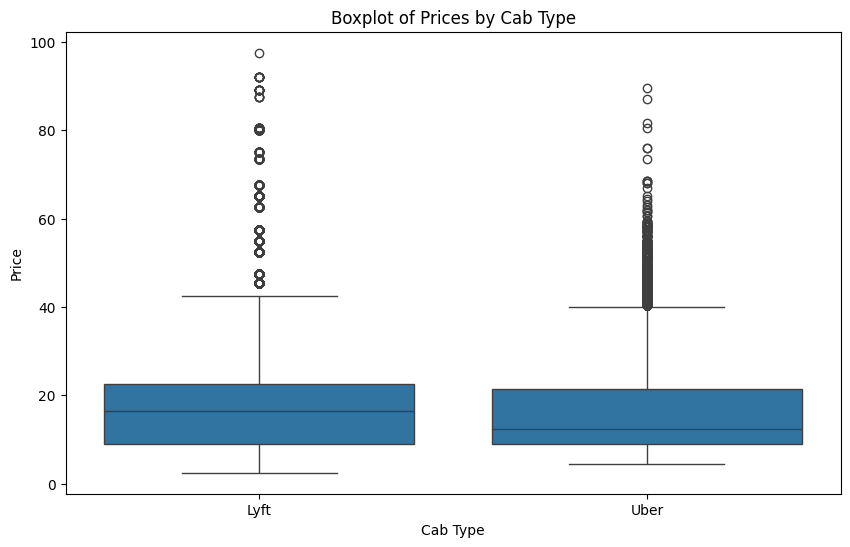

In [172]:
# Boxplot of prices by cab type
plt.figure(figsize=(10, 6))
plot = sns.boxplot(x='cab_type', y='price', data=data)
plt.title('Boxplot of Prices by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Price')
#fig = plot.get_figure()
#fig.savefig('eda_output/boxplot.png')
plt.show()


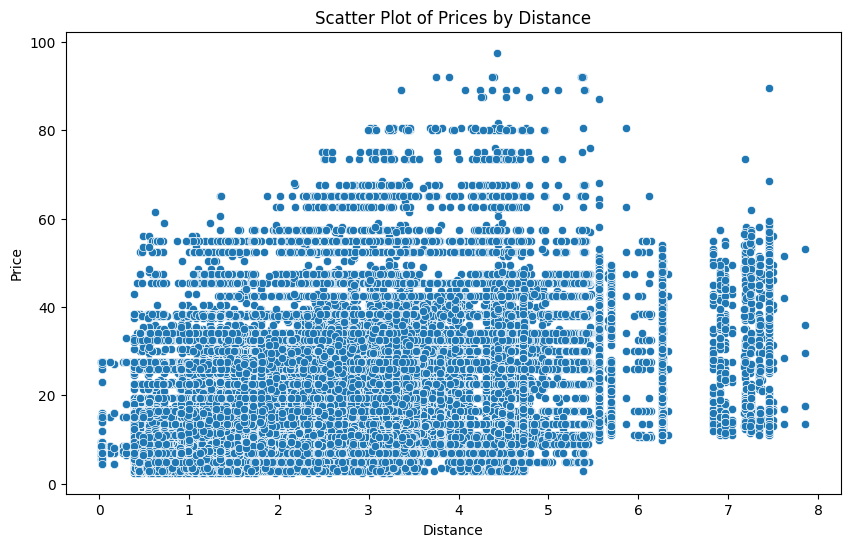

In [173]:

# Scatter plot of prices by distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='price', data=data)
plt.title('Scatter Plot of Prices by Distance')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()